In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
RawData = pd.read_csv("/content/drive/MyDrive/Medical Insurance Cost/medical_insurance.csv")
y = RawData['charges']
x = RawData.drop(columns=['charges'])
print("Number of Entries:", str(len(y)))
RawData.head()

Number of Entries: 2772


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Response Exploration

In [3]:
def col_range(series):
  return np.min(series), np.max(series)

def col_range_int(series):
  return int(np.min(series)), int(np.max(series))

In [4]:
print("Range:", col_range_int(y))
print("Mean:", int(np.mean(y)))
print("Median:", int(np.median(y)))
print("Standard Deviation:", int(np.std(y)))

Range: (1121, 63770)
Mean: 13261
Median: 9333
Standard Deviation: 12149


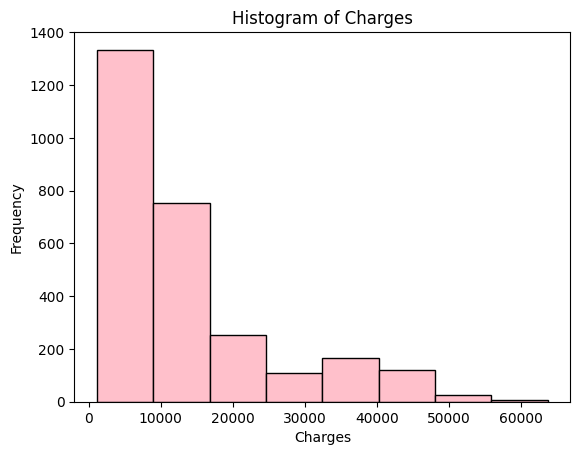

In [5]:
plt.hist(y, bins=8, color='pink', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')

plt.show()

In [36]:
# Range: (1121, 63770)

for i in range(5):
  lower = 1120+12600*(i)
  upper = 1120+12600*(i+1)
  print(f"There are {len(y[(y >= lower) & (y < upper)])} samples between {lower} and {upper}")

There are 1942 samples between 1120 and 13720
There are 438 samples between 13720 and 26320
There are 198 samples between 26320 and 38920
There are 182 samples between 38920 and 51520
There are 12 samples between 51520 and 64120


# Predictor Exploration

In [6]:
def plot_continuous_linearity(data, x, y, axc):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, ax=axc)
    axc.set_title(f"Linearity Check: {y} vs {x}")
    axc.set_xlabel(x)
    axc.set_ylabel(y)
    plt.show()


def plot_binary_linearity(data, x, y, axc):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x, y=y, ax=axc)
    axc.set_title(f"Linearity Check: {y} by {x}")
    axc.set_xlabel(x)
    axc.set_ylabel(y)
    plt.show()

def plot_categorical_linearity(data, x, y, axc, rot):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=x, y=y, ax=axc)
    axc.set_title(f"Linearity Check: {y} by {x}")
    axc.set_xlabel(x)
    axc.set_ylabel(y)
    #axc.set_xticks(data[x].unique(), rotation=45)
    axc.set_xticklabels(data[x].unique(), rotation=rot)
    plt.show()

response_variable = 'charges'

### Age

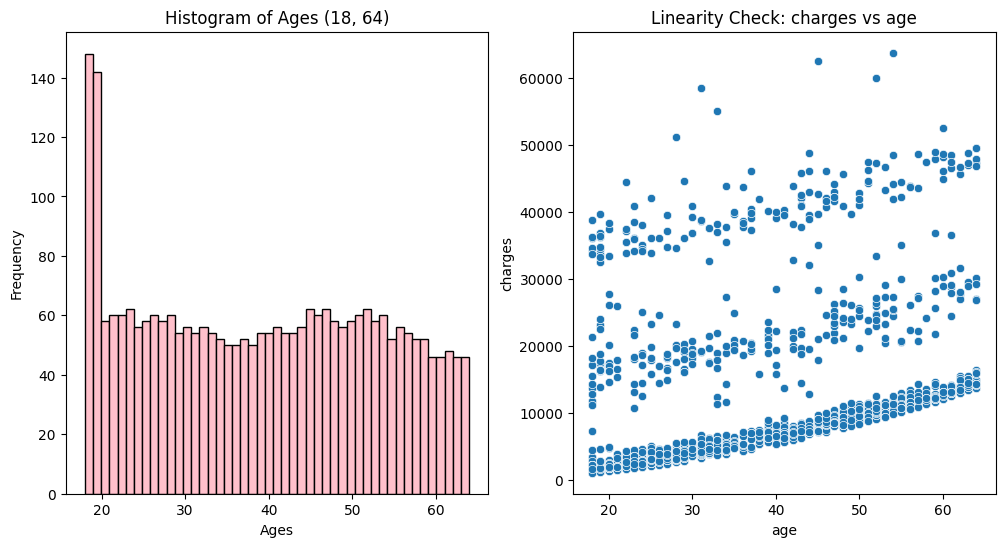

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(x["age"], bins=len(x["age"].unique()), color='pink', edgecolor='black')
axes[0].set_xlabel('Ages')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f"Histogram of Ages {str(col_range_int(x['age']))}")

plot_continuous_linearity(RawData, "age", response_variable, axes[1])

plt.tight_layout()
plt.show()

The fact that the Linearity Check plot exhibits three quasi-linear patterns that run parallel to one another suggests that age is inexorably intertwined with one or more variables. It could also be posited that age will likely serve as some sort of sub-classifier into a 'tier of cost'. Decision Tree or Random Forest models are better equipped for handling such variables.

### Sex

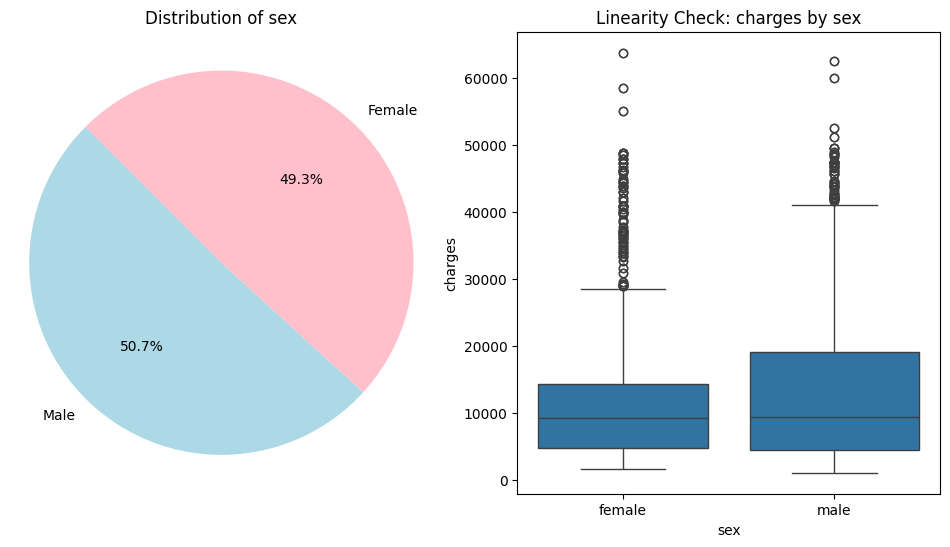

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Number of Male: 1406
Number of Female: 1366


In [8]:
x['sex'] = x['sex'].str.capitalize()

def binary_data(data, color1, color2, angle):
  binary_counts = data.value_counts()
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%',
          startangle=angle, colors=[color1, color2])
  axes[0].set_title(f"Distribution of {str(data.name)}")
  axes[0].axis('equal')                                                   # Equal aspect ratio ensures that pie is drawn as a circle.

  plot_binary_linearity(RawData, data.name, response_variable, axes[1])

  plt.tight_layout()
  plt.show()
  print("")                                                           # spacing

  for category in binary_counts.index:
    print("Number of {}: {}".format(category, binary_counts[category]))



binary_data(x['sex'], 'lightblue', 'pink', 135)

The distribution of sex is fairly even. The Linearity Check plot shows plenty of "outliers" outside the whiskers due to the large number of samples under $20,000.

In any case, there is a noticeable difference in the distribution of the response variable between the two categories but similiar median values, suggesting a potential linear relationship.


### BMI

In [9]:
print("Range:", col_range(x["bmi"]))
print("Mean:", np.round(np.mean(x["bmi"]),2))
print("Median:", np.round(np.median(x["bmi"]),2))
print("Standard Deviation:", np.round(np.std(x["bmi"]),2))

Range: (15.96, 53.13)
Mean: 30.7
Median: 30.45
Standard Deviation: 6.13


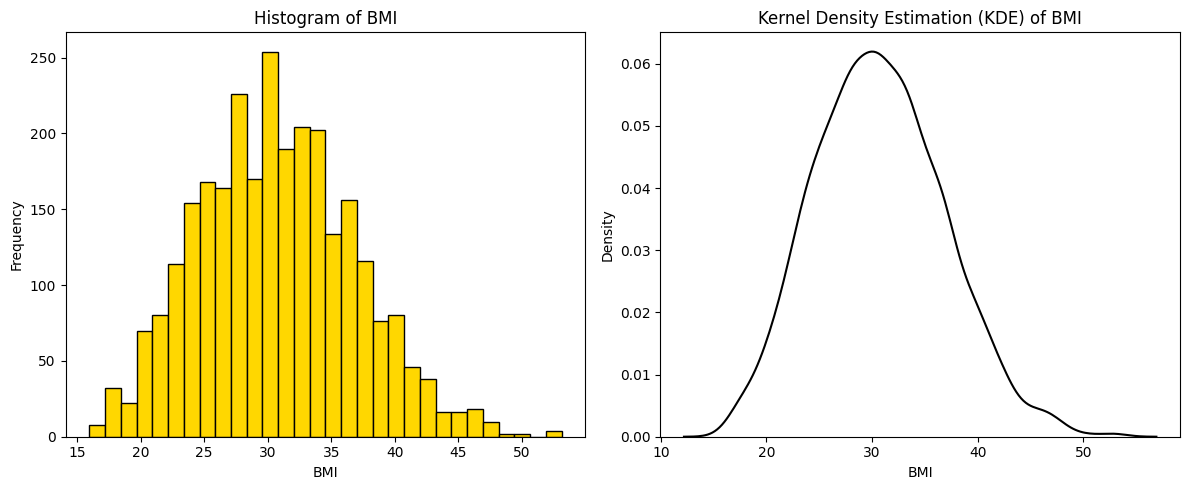

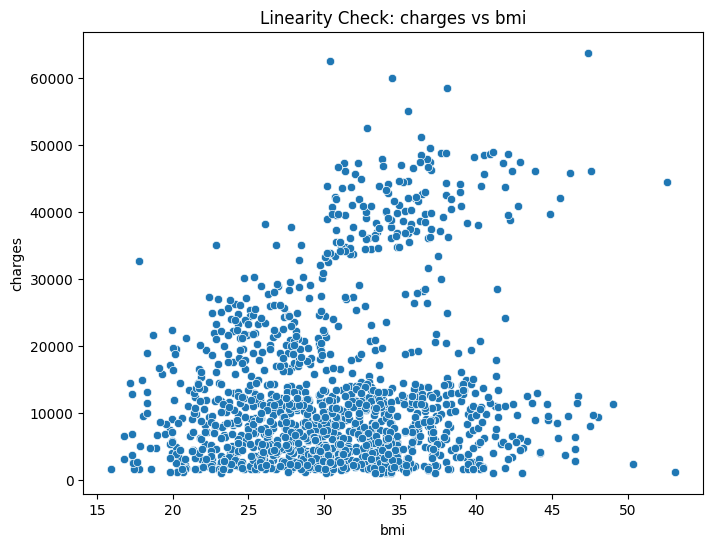

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(x['bmi'], bins=30, color='gold', edgecolor='black')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BMI')

sns.kdeplot(x['bmi'], color='black', ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].set_title('Kernel Density Estimation (KDE) of BMI')

plt.tight_layout()
plt.show()


def single_plot_continuous_linearity(data, x, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f"Linearity Check: {y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

single_plot_continuous_linearity(RawData, 'bmi', response_variable)

Although it may initially appear to be a loose scatterplot, the chaotic nature is likely due to the overwhelming number of samples on the lower end of charges. With some class balancing, although there would still be outliers, it should present a much more linear picture.

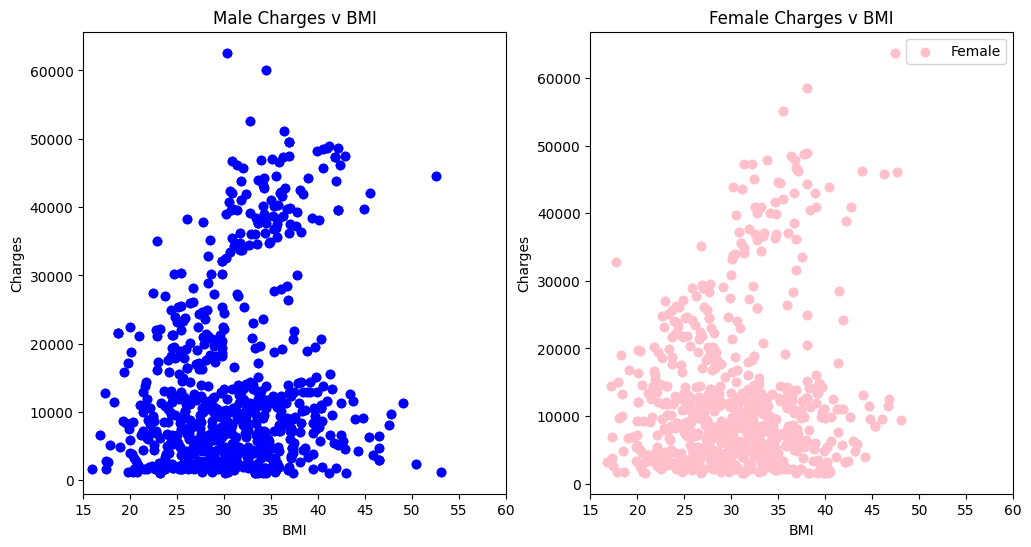

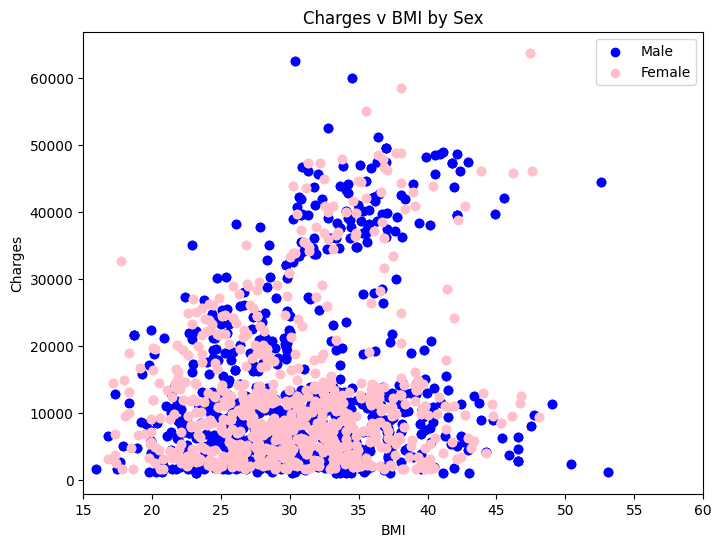

In [11]:
male_data = RawData[RawData['sex'] == 'male']
female_data = RawData[RawData['sex'] == 'female']


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(male_data['bmi'], male_data['charges'], color='blue', label='Male')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Male Charges v BMI')
axes[0].set_xlim(15, 60)

axes[1].scatter(female_data['bmi'], female_data['charges'], color='pink', label='Female')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].set_title('Female Charges v BMI')
axes[1].legend()
axes[1].set_xlim(15, 60)


plt.figure(figsize=(8, 6))
plt.scatter(male_data['bmi'], male_data['charges'], color='blue', label='Male')
plt.scatter(female_data['bmi'], female_data['charges'], color='pink', label='Female')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges v BMI by Sex')
plt.legend()
plt.xlim(15, 60)
plt.show()


### Children

<ipython-input-6-e792cefc2a70>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axc.set_xticklabels(data[x].unique(), rotation=rot)


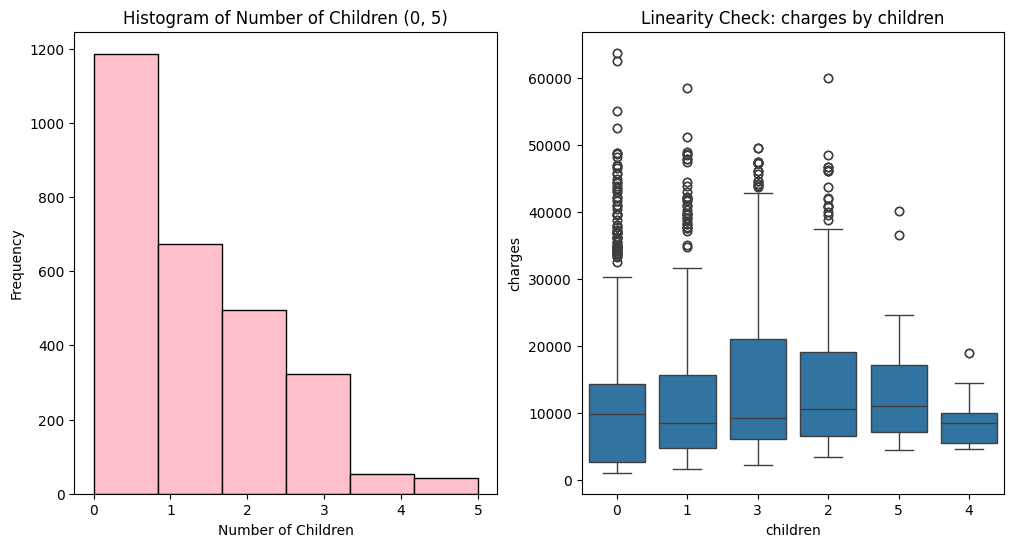

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(x["children"], bins=len(x["children"].unique()), color='pink', edgecolor='black')
axes[0].set_xlabel('Number of Children')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f"Histogram of Number of Children {str(col_range_int(x['children']))}")

plot_categorical_linearity(RawData, "children", response_variable, axes[1], 0)


plt.tight_layout()
plt.show()

The more represented classes have more outliers but are still biased towards the bottom due to the sheer volume of samples below $20,000. The differing distributions among the boxplots suggest a linear relationship between the variables.


### Smoker

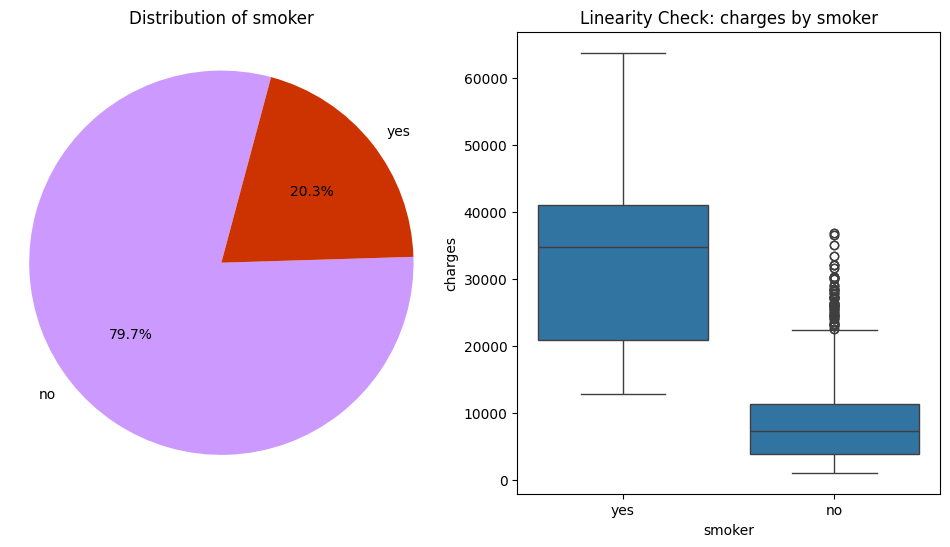

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>


Number of no: 2208
Number of yes: 564


In [13]:
binary_data(x['smoker'], '#cc99FF', '#cc3300', 75)

There seems to be a 4:1 ratio of non-smokers to smokers. However, the boxplots show quite a discrepancy between the distributions of the two categories, strongly suggesting a linear relationship between smoker and charges.

### Region

In [14]:
x['region'] = x['region'].str.capitalize()
region_counts = x['region'].value_counts()

for region in region_counts.index:
    print("Number of {}: {}".format(region, region_counts[region]))

Number of Southeast: 766
Number of Southwest: 684
Number of Northwest: 664
Number of Northeast: 658


<ipython-input-6-e792cefc2a70>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axc.set_xticklabels(data[x].unique(), rotation=rot)


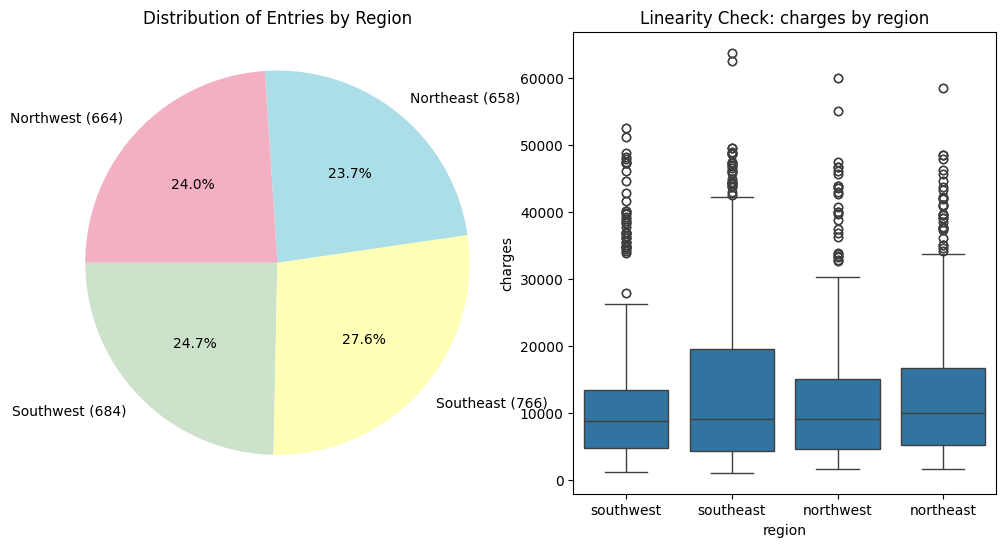

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
region_counts = region_counts.reindex(['Southwest', 'Southeast', 'Northeast', 'Northwest'])


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(region_counts, labels=['{} ({})'.format(region, count) for region, count in zip(region_counts.index, region_counts)],
        autopct='%1.1f%%', startangle=180, colors=["#CCE2CB", "#FFFFB5", "#ABDEE6", "#F3B0C3"])
axes[0].set_title('Distribution of Entries by Region')
axes[0].axis('equal')


plot_categorical_linearity(RawData, "region", response_variable, axes[1], 0)


plt.tight_layout()
plt.show()

The representation of each region is fairly balanced, but the boxplots display different distributions, suggesting a potential linear relationship.